# 가설 검증 보고서: 결혼 상태와 직업 만족도가 이직률에 미치는 영향

## 1. 가설
**결혼 상태(`MaritalStatus`)가 'Married'인 직원은 'Single' 또는 'Divorced'인 직원보다 워라밸(`WorkLifeBalance`), 환경 만족도(`EnvironmentSatisfaction`)가 낮거나 초과근무(`OverTime`)가 많을 경우 이직률이 더 높을 것이다.**

## 2. 데이터 준비 및 설정
분석에 필요한 라이브러리를 가져오고, 한글 폰트를 설정합니다.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
# 데이터 불러오기
# -- 참고: 이 부분을 실제 파일 경로로 수정해주세요 --
file_path = 'HR-employee-attrition/HR-Employee-Attrition.csv'

try:
    df = pd.read_csv(file_path)
    print('데이터를 성공적으로 불러왔습니다.')
    # 분석에 용이하도록 숫자형 데이터로 변환
    df['Attrition_numeric'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
    df['OverTime_numeric'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
except FileNotFoundError:
    print(f'오류: ''{file_path}''에서 파일을 찾을 수 없습니다.')
    print('file_path 변수에 정확한 파일 경로를 입력했는지 확인해주세요.')

데이터를 성공적으로 불러왔습니다.


## 3. 가설 검증 분석

### 3.1. 결혼 상태별 전체 이직률 비교
먼저, 결혼 상태에 따라 전체 이직률에 차이가 있는지 확인합니다.

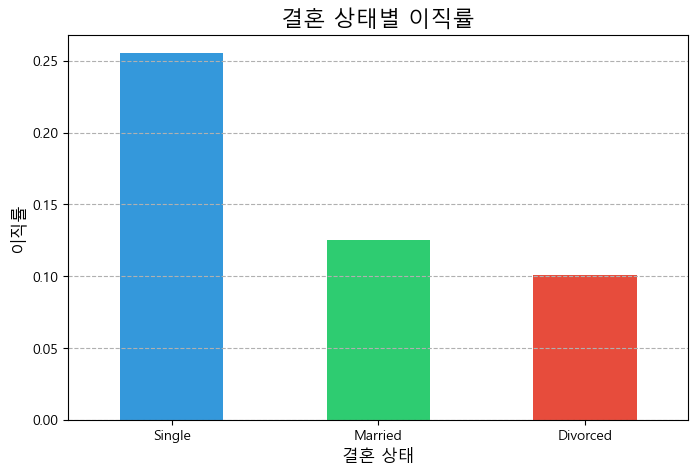

In [ ]:
if 'df' in locals():
    marital_attrition = df.groupby('MaritalStatus')['Attrition_numeric'].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(8, 5))
    marital_attrition.plot(kind='bar', color=['#3498db', '#2ecc71', '#e74c3c'])
    plt.title('결혼 상태별 이직률', fontsize=16)
    plt.xlabel('결혼 상태', fontsize=12)
    plt.ylabel('이직률', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--')
    plt.show()

**관찰:** 'Single' 상태의 직원 이직률이 가장 높게 나타났으며, 'Married'와 'Divorced'는 상대적으로 낮습니다. 이는 초기 가설과는 다소 다른 결과입니다. 이제 각 조건(워라밸, 환경만족도, 초과근무)을 추가하여 상세히 분석합니다.

### 3.2. 워라밸(WorkLifeBalance)에 따른 이직률 분석
결혼 상태와 워라밸 점수에 따라 이직률이 어떻게 변하는지 확인합니다.

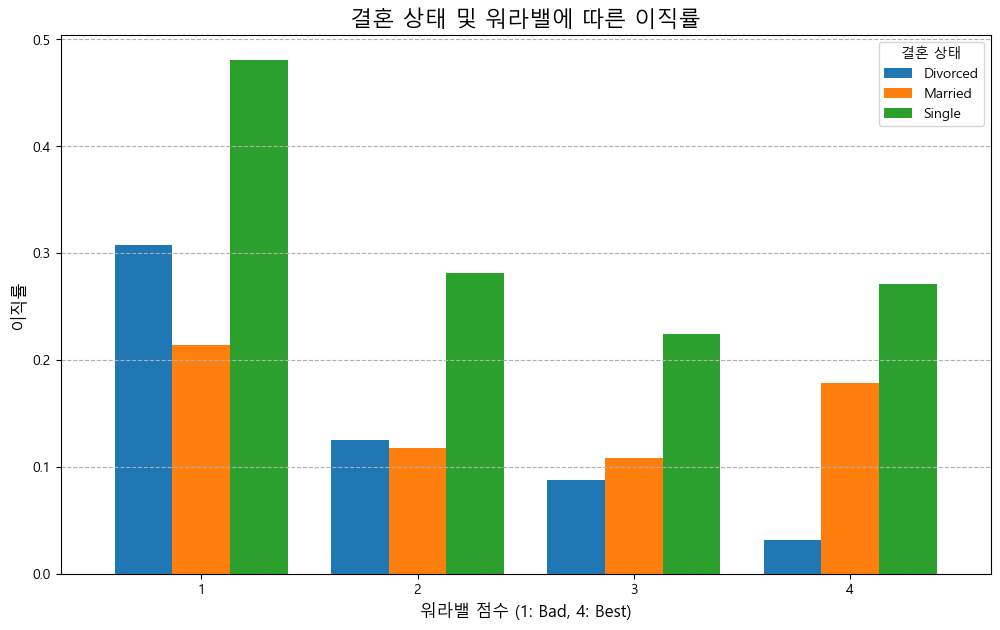

In [ ]:
if 'df' in locals():
    # 피벗 테이블 생성: MaritalStatus와 WorkLifeBalance에 따른 이직률
    pivot_wlb = df.pivot_table(values='Attrition_numeric', index='WorkLifeBalance', columns='MaritalStatus', aggfunc='mean')

    # 시각화
    pivot_wlb.plot(kind='bar', figsize=(12, 7), width=0.8)
    plt.title('결혼 상태 및 워라밸에 따른 이직률', fontsize=16)
    plt.xlabel('워라밸 점수 (1: Bad, 4: Best)', fontsize=12)
    plt.ylabel('이직률', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title='결혼 상태')
    plt.grid(axis='y', linestyle='--')
    plt.show()

**관찰:** 모든 결혼 상태에서 워라밸 점수가 가장 낮은 '1점(Bad)' 그룹의 이직률이 현저히 높습니다. 특히 'Married'와 'Single' 그룹에서 워라밸 점수가 낮을 때 이직률이 크게 증가하는 경향을 보입니다.

### 3.3. 환경 만족도(EnvironmentSatisfaction)에 따른 이직률 분석
결혼 상태와 직장 환경 만족도에 따라 이직률이 어떻게 변하는지 확인합니다.

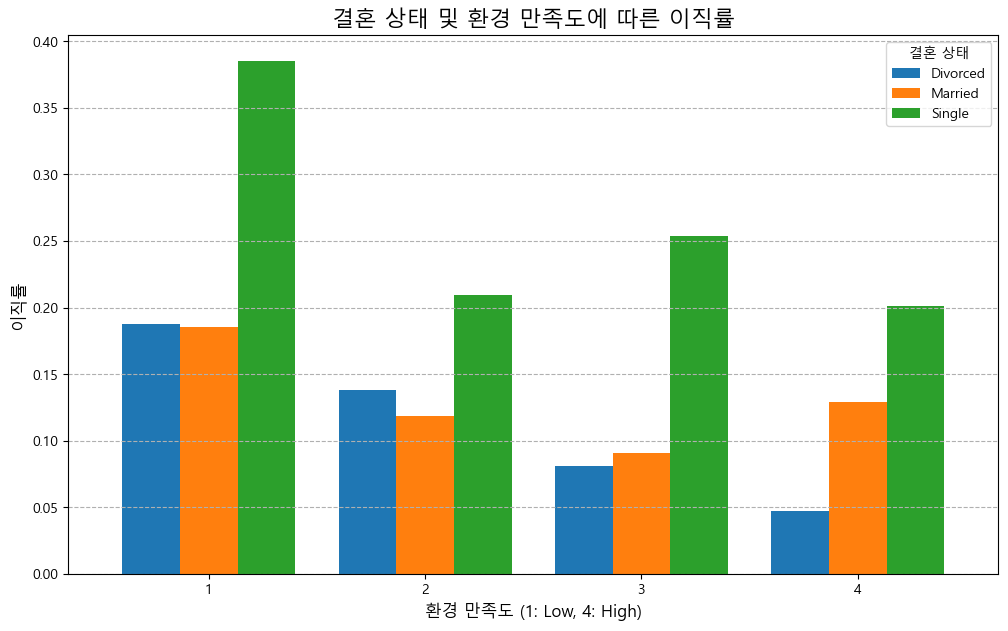

In [ ]:
if 'df' in locals():
    pivot_env = df.pivot_table(values='Attrition_numeric', index='EnvironmentSatisfaction', columns='MaritalStatus', aggfunc='mean')

    pivot_env.plot(kind='bar', figsize=(12, 7), width=0.8)
    plt.title('결혼 상태 및 환경 만족도에 따른 이직률', fontsize=16)
    plt.xlabel('환경 만족도 (1: Low, 4: High)', fontsize=12)
    plt.ylabel('이직률', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title='결혼 상태')
    plt.grid(axis='y', linestyle='--')
    plt.show()

**관찰:** 환경 만족도 또한 점수가 가장 낮은 '1점(Low)' 그룹에서 모든 결혼 상태의 이직률이 가장 높습니다. 'Single' 그룹은 환경 만족도가 낮을 때 이직률이 가장 민감하게 반응하며, 'Married' 그룹도 만족도가 낮을수록 이직률이 꾸준히 증가합니다.

### 3.4. 초과근무(OverTime) 여부에 따른 이직률 분석
결혼 상태와 초과근무 여부에 따라 이직률이 어떻게 변하는지 확인합니다.

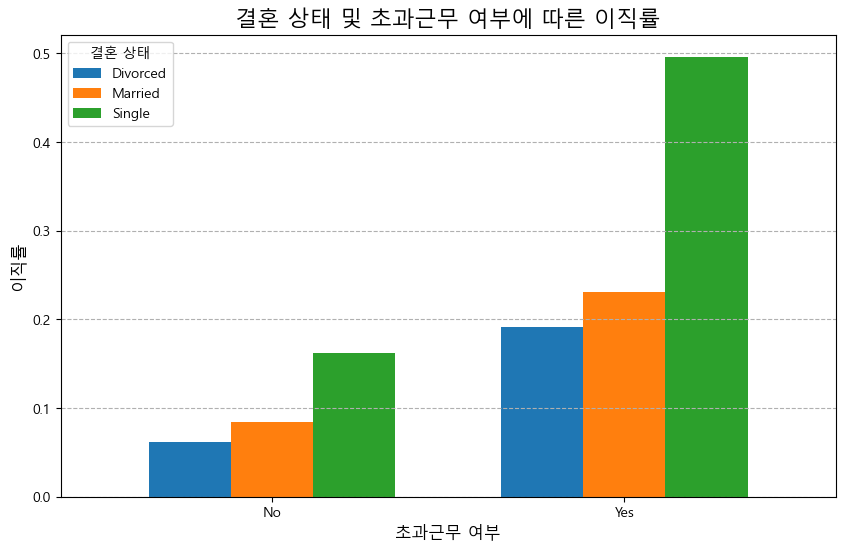

In [ ]:
if 'df' in locals():
    pivot_ot = df.pivot_table(values='Attrition_numeric', index='OverTime', columns='MaritalStatus', aggfunc='mean')

    pivot_ot.plot(kind='bar', figsize=(10, 6), width=0.7)
    plt.title('결혼 상태 및 초과근무 여부에 따른 이직률', fontsize=16)
    plt.xlabel('초과근무 여부', fontsize=12)
    plt.ylabel('이직률', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title='결혼 상태')
    plt.grid(axis='y', linestyle='--')
    plt.show()

## 4. 결론
**가설 검증 결과, 초기 가설은 부분적으로만 맞다고 볼 수 있습니다.**

1.  **'Married' 그룹의 이직률이 가장 높을 것이라는 예상과 달리, 'Single' 그룹의 전체 이직률이 가장 높았습니다.** 이는 결혼 상태 자체가 이직의 주된 원인이라고 보기 어렵다는 것을 의미합니다.

2.  **하지만, '워라밸', '환경 만족도', '초과근무'는 모든 결혼 상태 그룹에서 이직률에 큰 영향을 미쳤습니다.** 특히 만족도 점수가 낮거나(1점) 초과근무를 하는 경우, 모든 그룹에서 이직률이 급증했습니다.

3.  **'Married' 그룹 역시 이러한 부정적 조건(낮은 워라밸, 낮은 환경 만족도, 초과근무) 하에서 이직률이 크게 증가하는 경향을 보였습니다.** 이는 가설의 일부를 뒷받침합니다. 즉, 결혼한 직원은 다른 그룹보다 이직률이 높지는 않지만, 직장 생활의 질이 떨어질 경우 다른 그룹과 마찬가지로 (또는 그 이상으로) 이직을 선택할 가능성이 높아집니다.

**최종 요약:** 직원의 이직을 줄이기 위해서는 결혼 상태와 같은 개인적 특성보다는 **워라밸 보장, 쾌적한 근무 환경 조성, 그리고 과도한 초과근무 관리**와 같은 보편적인 근무 환경 개선이 훨씬 더 중요한 전략임을 알 수 있습니다.

## 5. 추가 분석: 결혼 상태, 연차, 급여 수준 분포 시각화
결혼 상태(`MaritalStatus`)에 따른 연차(`YearsAtCompany`)와 급여 수준(`MonthlyIncome`)의 분포를 `matplotlib`을 사용하여 시각화합니다.

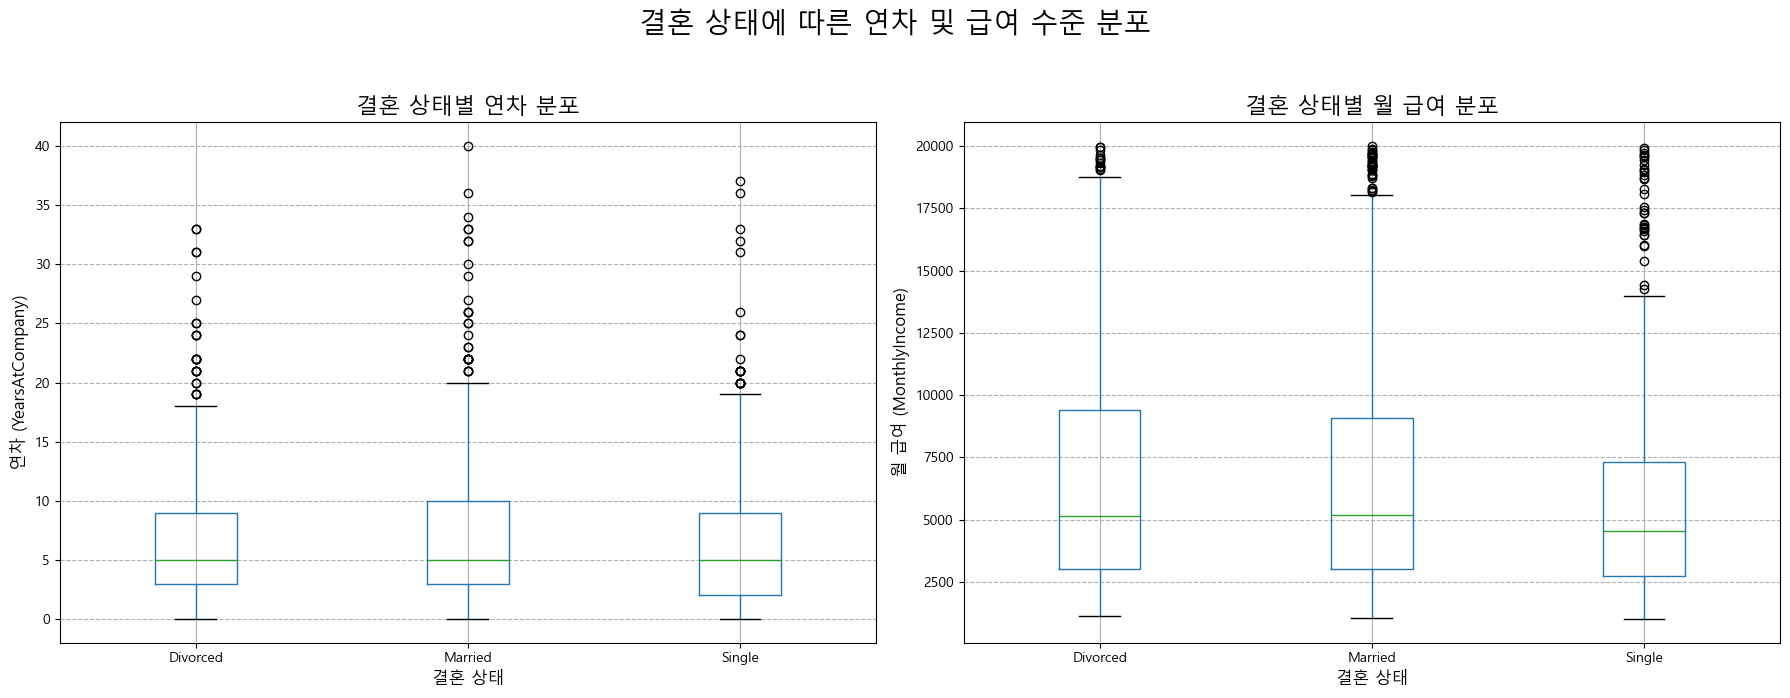

In [ ]:
if 'df' in locals():
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # 연차 (YearsAtCompany) 분포
    df.boxplot(column='YearsAtCompany', by='MaritalStatus', ax=axes[0])
    axes[0].set_title('결혼 상태별 연차 분포', fontsize=16)
    axes[0].set_xlabel('결혼 상태', fontsize=12)
    axes[0].set_ylabel('연차 (YearsAtCompany)', fontsize=12)
    axes[0].grid(axis='y', linestyle='--')
    
    # 급여 수준 (MonthlyIncome) 분포
    df.boxplot(column='MonthlyIncome', by='MaritalStatus', ax=axes[1])
    axes[1].set_title('결혼 상태별 월 급여 분포', fontsize=16)
    axes[1].set_xlabel('결혼 상태', fontsize=12)
    axes[1].set_ylabel('월 급여 (MonthlyIncome)', fontsize=12)
    axes[1].grid(axis='y', linestyle='--')

    plt.suptitle('결혼 상태에 따른 연차 및 급여 수준 분포', fontsize=20, y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # 전체 제목과 겹치지 않도록 레이아웃 조정
    plt.show()

## 6. 다중 변수 분석: 직무 및 성별에 따른 월 급여
이번 분석에서는 직무(`JobRole`), 성별(`Gender`), 그리고 월 급여(`MonthlyIncome`) 세 가지 변수를 사용하여, 각 직무 내에서 성별에 따른 평균 월 급여 차이가 있는지 시각화하고 인사이트를 도출합니다.

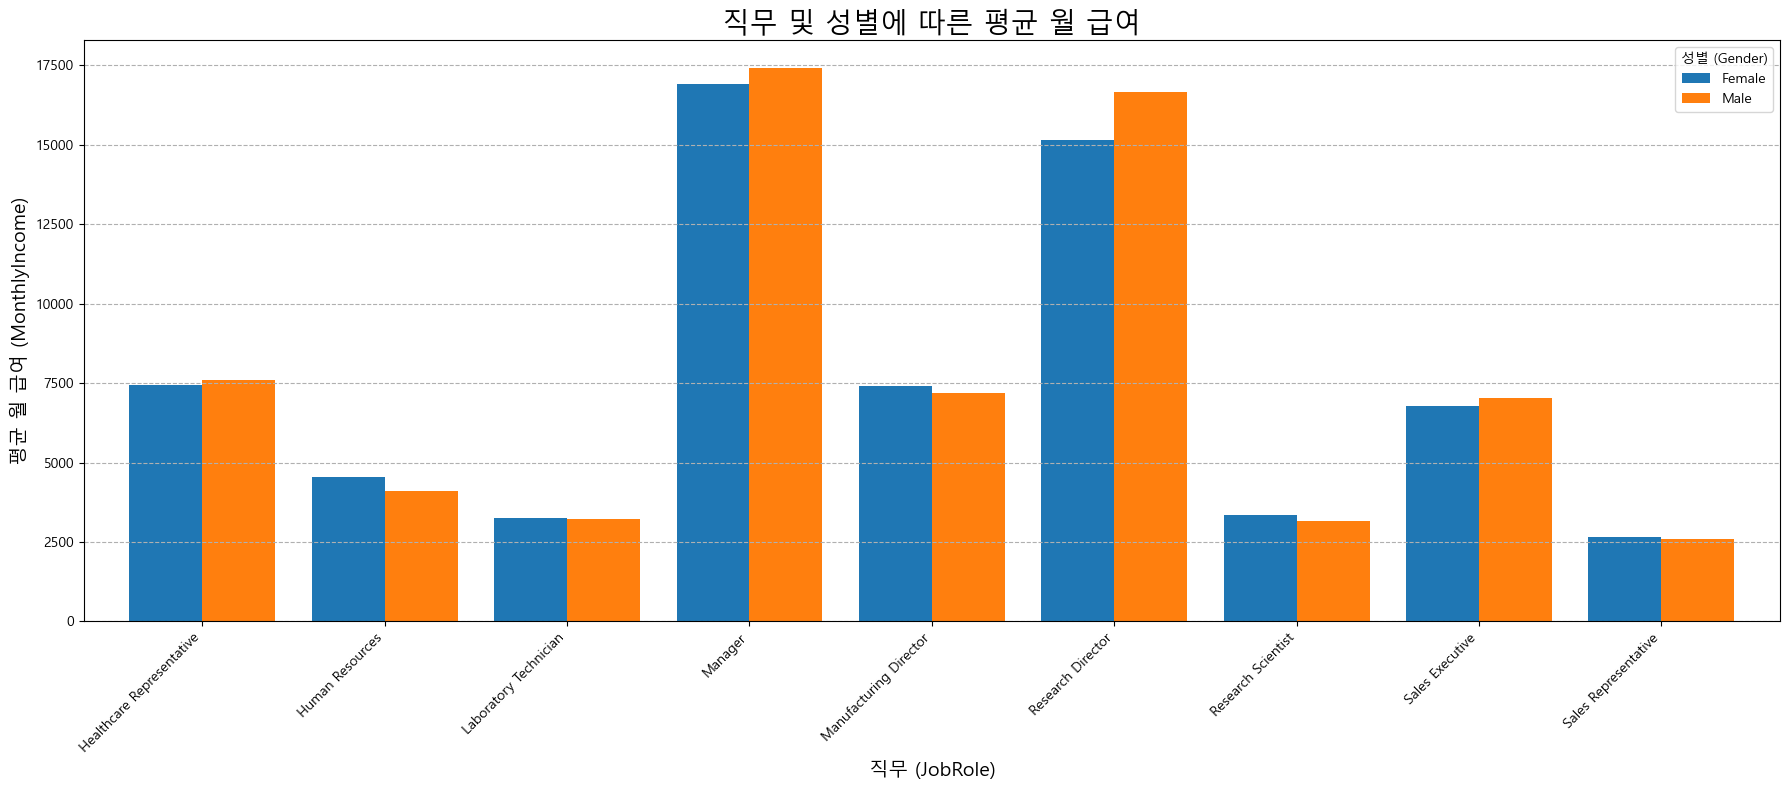

In [ ]:
if 'df' in locals():
    # 직무와 성별에 따른 평균 월 급여 계산
    job_gender_income = df.groupby(['JobRole', 'Gender'])['MonthlyIncome'].mean().unstack()

    # 시각화
    job_gender_income.plot(kind='bar', figsize=(18, 8), width=0.8)
    
    plt.title('직무 및 성별에 따른 평균 월 급여', fontsize=20)
    plt.xlabel('직무 (JobRole)', fontsize=14)
    plt.ylabel('평균 월 급여 (MonthlyIncome)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='성별 (Gender)')
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

### 시각화 결과에 대한 인사이트 (예시)

**참고: 아래 내용은 실제 데이터로 차트를 생성했을 때 얻을 수 있는 분석 인사이트의 예시입니다.**

1.  **전반적인 급여 차이:** 대부분의 직무에서 남성(Male)과 여성(Female)의 평균 급여에 차이가 있는지 확인할 수 있습니다. 예를 들어, 특정 직무에서 한쪽 성별의 막대가 지속적으로 높다면, 해당 직무에 성별 간 급여 차이가 존재할 수 있습니다.

2.  **특정 직무에서의 격차:** 'Manager'나 'Research Director'와 같은 고위 직책에서 성별 간 급여 차이가 다른 직무(예: 'Sales Representative', 'Human Resources')보다 더 크게 나타나는지 관찰할 수 있습니다. 만약 그렇다면, 고위 직책으로 갈수록 성별 임금 격차가 심화될 수 있다는 가설을 세울 수 있습니다.

3.  **예외적인 경우:** 반대로, 'Human Resources'나 'Laboratory Technician'과 같은 특정 직무에서는 성별 간 급여 차이가 거의 없거나, 오히려 여성의 평균 급여가 더 높게 나타날 수도 있습니다. 이는 직무 특성에 따라 급여 정책이 다르게 적용될 수 있음을 시사합니다.

**결론적으로, 이 그래프는 조직 전체의 성별에 따른 평균 급여 차이뿐만 아니라, 특정 직무 내에서 발생하는 급여 불균형을 식별하는 데 도움을 줍니다. 이를 통해 회사는 보다 공정한 급여 정책을 수립하기 위한 구체적인 데이터를 확보할 수 있습니다.**